In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def grayscale(image):
    height,width,channels = image.shape
    gray_image = np.zeros((height,width))
    for i in range(height):
        for j in range(width):
            pixel_value = sum(image[i,j])/channels
            gray_image[i,j] = pixel_value
    return gray_image

In [5]:
image = cv2.imread("beautiful-nature-scenery-free-photo (1).jpg")

(-0.5, 2209.5, 1472.5, -0.5)

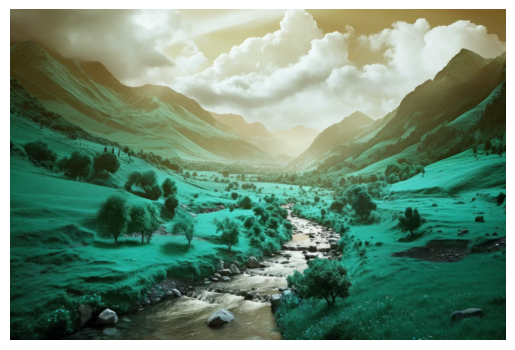

In [7]:
plt.imshow(image)
plt.axis("off")

(-0.5, 2209.5, 1472.5, -0.5)

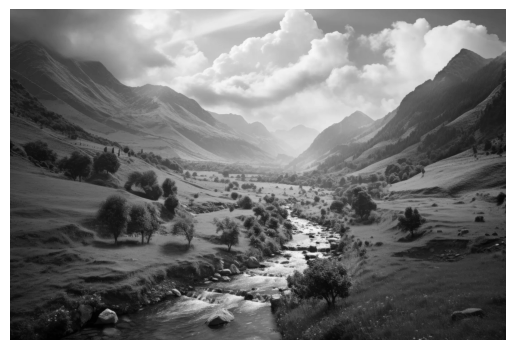

In [9]:
gray_image = grayscale(image)
plt.imshow(gray_image,cmap="gray")
plt.axis("off")

In [10]:
def crop(image,x,y):
    height,width,_ = image.shape
    cropped_image = image[x:x+height,y:y+height]
    return cropped_image

In [15]:
cp_img = crop(image,1000,200)

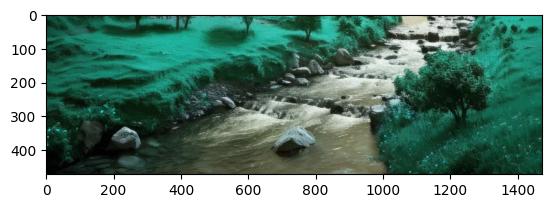

In [16]:
plt.imshow(cp_img)

In [20]:
image1 = cv2.imread("image1.png")
image2 = cv2.imread("image2.png")

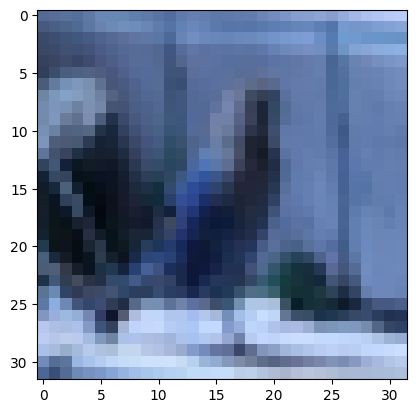

In [23]:
plt.imshow(image1)

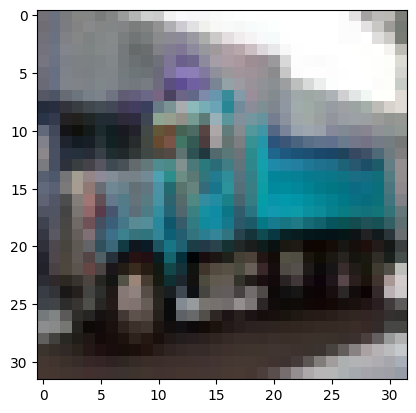

In [24]:
plt.imshow(image2)

In [44]:
def add_images(image1,image2):
    assert image1.shape == image2.shape, "Images must have same size"
    height,width,channels = image1.shape
    output = image1.copy()
    for i in range(height):
        for j in range(width):
            for c in range(channels):
                output[i,j,c] = min((int(image1[i,j,c])+int(image2[i,j,c])),255)
    return output 

In [50]:
def divide(image1,image2):
    assert image1.shape == image2.shape, "Images must have same size"
    height,width,channels = image1.shape
    output = image1.copy()
    for i in range(height):
        for j in range(width):
            for c in range(channels):
                if(image2[i,j,c] != 0):
                    output[i,j,c] = min(int(image1[i,j,c])/int(image2[i,j,c]),255)
                else:
                    output[i,j,c] = 0
    return output

In [67]:
def and_images(image1,image2,n):
    assert image1.shape == image2.shape, "Images must have same size"
    height,width,channels = image1.shape
    output = image1.copy()
    for i in range(height):
        for j in range(width):
            for c in range(channels):
                output[i,j,c] = image1[i,j,c] << c
    return output 

In [83]:
def thresholding(image, threshold_value):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresholded_image = np.zeros_like(grayscale_image)
    height,width,_ = image.shape
    for i in range(height):
        for j in range(width):
            if(grayscale_image[i,j] > threshold_value):
                thresholded_image[i,j] = 255
    return thresholded_image

In [128]:
def gray_level_slicing_with_background(image,a,b):
    grey_img1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h,w,_ = image.shape
    wbg_img = np.zeros((h, w), np.uint8)
    for i in range(h):
      for j in range(w):
        r = grey_img1[i][j]
        if a <= r <= b:
            wbg_img[i][j] = 255
        else:
            wbg_img[i][j] = r
    return wbg_img

In [142]:
def gray_level_slicing_wo_background(image,a,b):
    grey_img1 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    h,w,_ = image.shape
    wo_img = np.zeros_like(grey_img1)
    for i in range(h):
        for j in range(w):
            if a <= grey_img1[i,j] <= b:
                wo_img[i,j] = 255
            else:
                wo_img[i,j] = 0
    return wo_img

In [143]:
wbg = gray_level_slicing_with_background(image,100,200)
wobg = gray_level_slicing_wo_background(image,100,200)

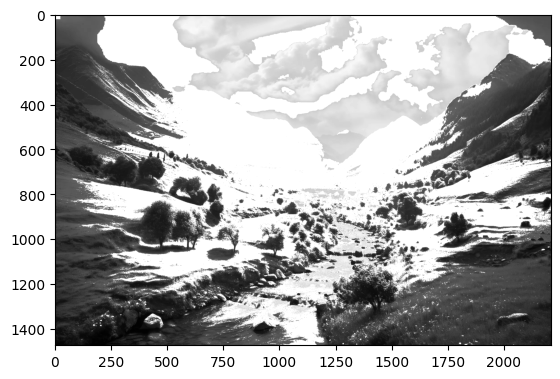

In [145]:
plt.imshow(wbg,cmap='gray')

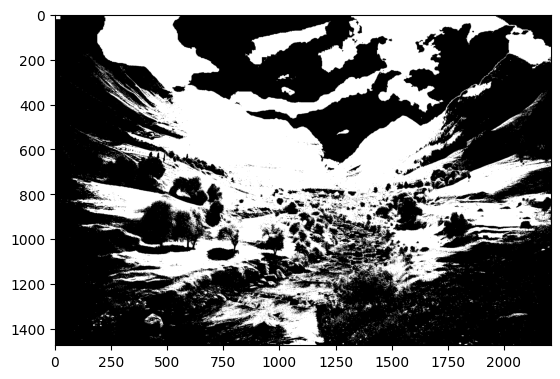

In [146]:
plt.imshow(wobg,cmap='gray')

In [137]:
import seaborn as sns

<Axes: ylabel='Count'>

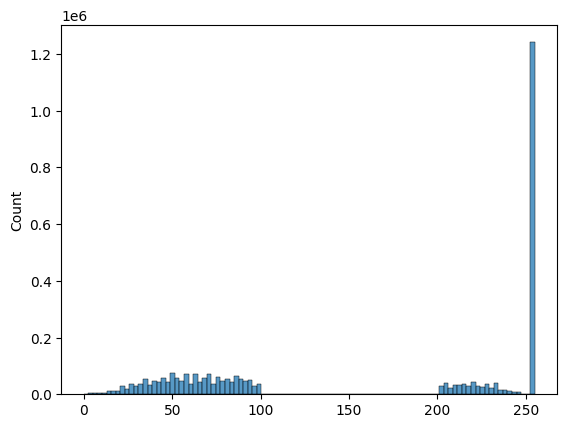

In [148]:
sns.histplot(wbg.flatten())

<Axes: ylabel='Count'>

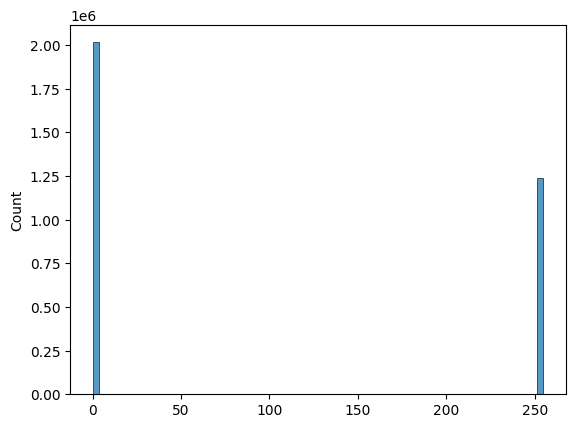

In [149]:
sns.histplot(wobg.flatten())

In [160]:
def contrast_stretching(image,s1,s2,r1,r2):
    height,width, channels= image.shape
    output = image.copy()

    alpha = s1/r1
    beta = (s2 - s1)/(r2 - r1)
    gamma = (255 - s2)/(255 - r2)
    for i in range(height):
        for j in range(width):
            for c in range(channels):
                if image[i,j,c] < r1:
                    output[i,j,c] = alpha*image[i,j,c]
                elif image[i,j,c] >= r1 and image[i,j,c] < r2:
                    output[i,j,c] = beta*(image[i,j,c] - r1) + s1
                else:
                    output[i,j,c] = gamma*(image[i,j,c] - r2) + s2
    return output

In [161]:
cs = contrast_stretching(image,20,60,10,100)

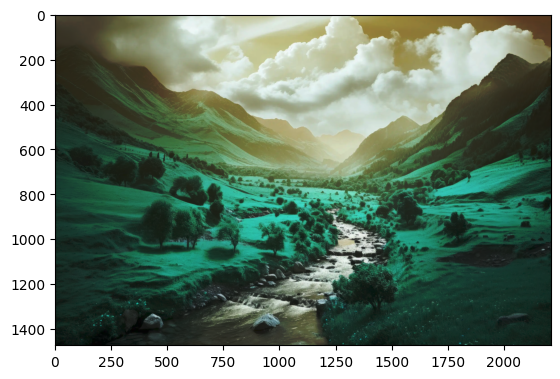

In [162]:
plt.imshow(cs)

In [170]:
def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    log_transformed_img = c * np.log(1 + img)
    return log_transformed_img.astype(np.uint8)

/var/folders/8_/kwpldt9d1g30rdsv0ghxcpwm0000gn/T/ipykernel_53037/3744619718.py:3: RuntimeWarning: divide by zero encountered in log
  log_transformed_img = c * np.log(1 + img)
/var/folders/8_/kwpldt9d1g30rdsv0ghxcpwm0000gn/T/ipykernel_53037/3744619718.py:4: RuntimeWarning: invalid value encountered in cast
  return log_transformed_img.astype(np.uint8)


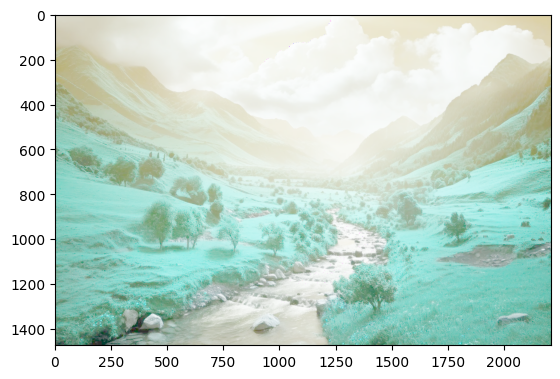

In [171]:
lg = log_transform(image)
plt.imshow(lg)

In [180]:
def power_law(image,c,gamma):
    h,w,c = image.shape
    output = image.copy()
    for i in range(h):
        for j in range(w):
            for ch in range(c):
                output[i,j,ch] = c*np.power(image[i,j,ch],gamma)
    return output

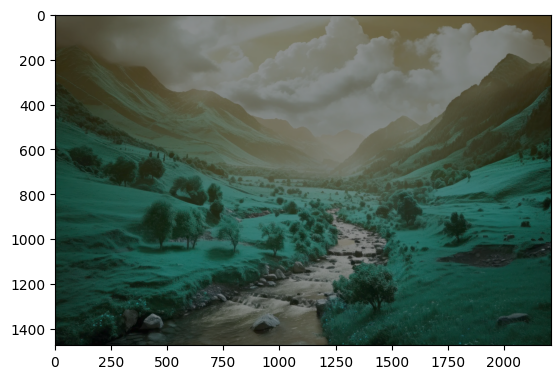

In [181]:
pw = power_law(image,0.6,0.7)
plt.imshow(pw)

In [182]:
def add_gaussian_noise(image,mean,std):
    gau = np.random.normal(mean,std,image.shape)
    image = image+gau
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


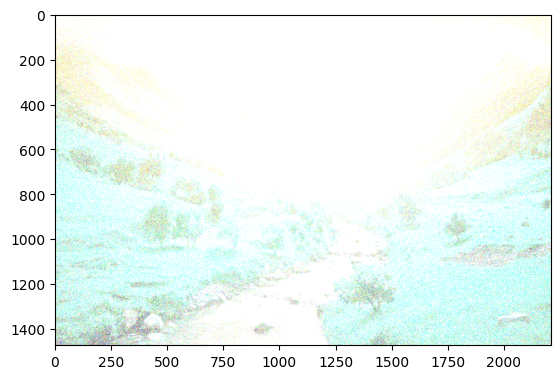

In [242]:
ga_im = add_gaussian_noise(image,20,40)
plt.imshow(ga_im)

In [243]:
def mean_filter(image, kernel_size=3):
    if kernel_size % 2 == 0:
        kernel_size += 1
    rows, cols, channels = image.shape
    padded_image = np.pad(image, ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2), (0, 0)))
    filtered_image = np.zeros_like(image)

    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    for i in range(rows):
        for j in range(cols):
            window = padded_image[i:i+kernel_size, j:j+kernel_size, :]
            for k in range(channels):
                filtered_image[i, j, k] = np.sum(window[:, :, k] * kernel)
    return filtered_image.astype(np.uint8)

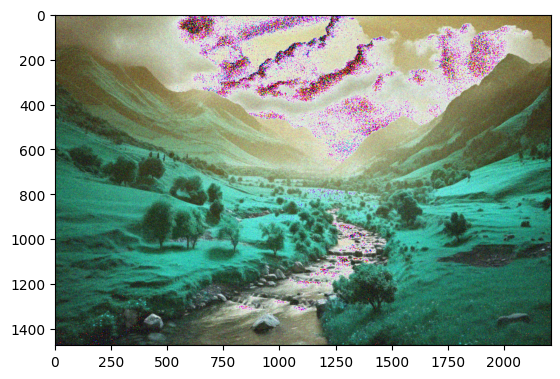

In [244]:
av_im_ga = mean_filter(ga_im)
plt.imshow(av_im_ga)

In [245]:
import random
def sna(image,salt_prob,pepper_prob):
    salt_thres = 1 - salt_prob
    pepper_thres = 1 - pepper_prob
    output = image.copy()
    h,w,_ = image.shape

    salt_noise = np.random.random((h,w))
    output[salt_noise > salt_thres] = 255

    pepper_noise = np.random.random((h,w))
    output[pepper_noise > pepper_thres] = 0

    return output


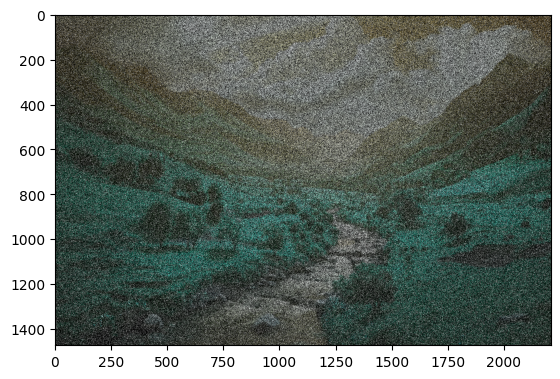

In [246]:
sna_im = sna(image,0.3,0.5)
plt.imshow(sna_im)

In [256]:
def median_filter(image,kernel_size = 3):
    h,w,ch = image.shape
    pad_img = np.pad(image,((kernel_size//2,kernel_size//2),(kernel_size//2,kernel_size//2),(0,0)))
    filtered_img = np.zeros_like(image)
    filter = np.ones((kernel_size,kernel_size))/(kernel_size*kernel_size)

    for i in range(h):
        for j in range(w):
            window = image[i:i+kernel_size,j:j+kernel_size,:]
            for c in range(ch):
                filtered_img[i,j,c] = np.median(window[:,:,c])
    return filtered_img


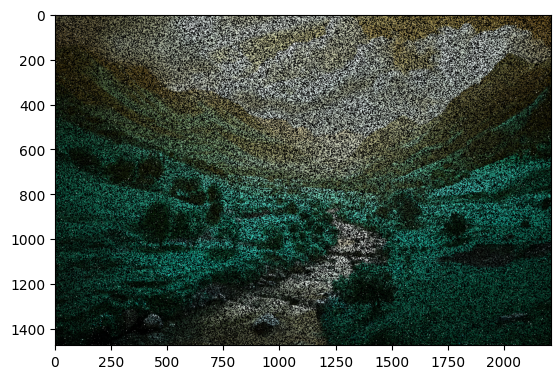

In [264]:
av_im_ga = median_filter(sna_im)
plt.imshow(av_im_ga)

In [320]:
def high_pass_filter(image):
    kernel = np.array(([-1,-1,-1],[-1,8,-1],[-1,-1,-1]))
    rows,cols,channels = image.shape
    if channels > 1:
        img_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    else:
        img_grey = image
    output = np.zeros_like(img_grey)

    for i in range(1,rows-1):
        for j in range(1,cols -1):
            output[i,j] = np.sum(img_grey[i-1:i+2,j-1:j+2]*kernel)
    output = np.clip(output,0,255)
    return output

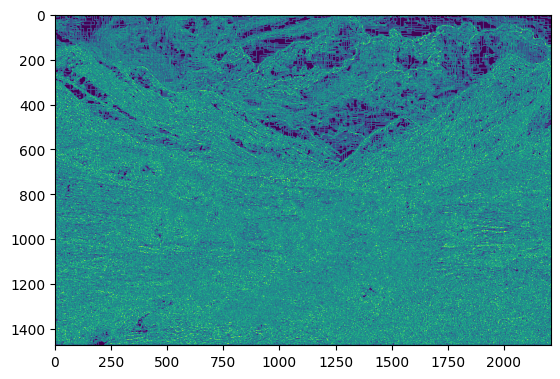

In [321]:
plt.imshow(high_pass_filter(image))

In [330]:
def  high_boost_filter(image,A):
    rows,cols,channels = image.shape
    if channels > 1:
        img_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    else:
        img_grey = image
    return (A-1)*img_grey+ high_pass_filter(image)

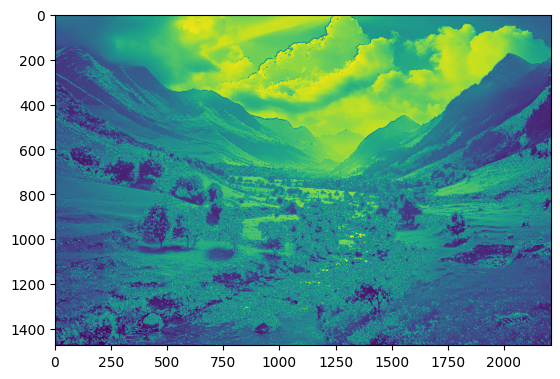

In [331]:
hbf=high_boost_filter(image,2)
plt.imshow(hbf)

In [338]:
def histogram_equalisation(image):
    rows, cols, _ = image.shape
    histogram = np.zeros(256,dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            histogram[image[i,j]] += 1

    cdf = np.zeros(256,dtype=np.float64)
    cdf[0] = histogram[0]
    for i in range(1,256):
        cdf[i] = cdf[i-1]+histogram[i]
    cdf = cdf/cdf.max() *255

    equalised = np.zeros_like(image)
    for i in range(rows):
        for j in range(cols):
            equalised[i,j] = cdf[image[i,j]]
    
    return equalised

In [343]:
equ = histogram_equalisation(image2)

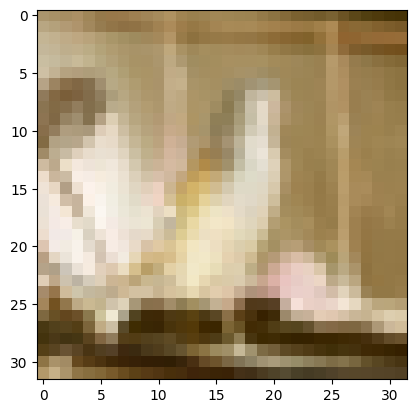

In [344]:
plt.imshow(image2)

<Axes: ylabel='Count'>

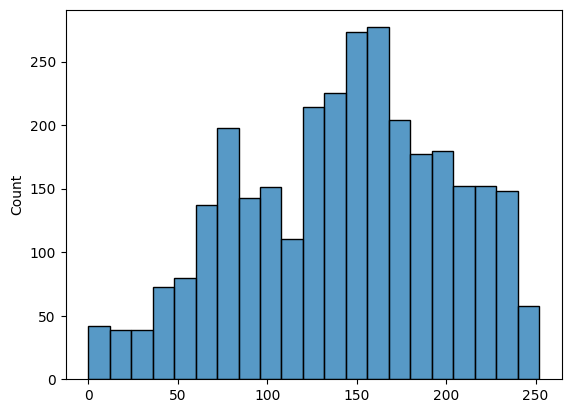

In [345]:
sns.histplot(image2.flatten())

<Axes: ylabel='Count'>

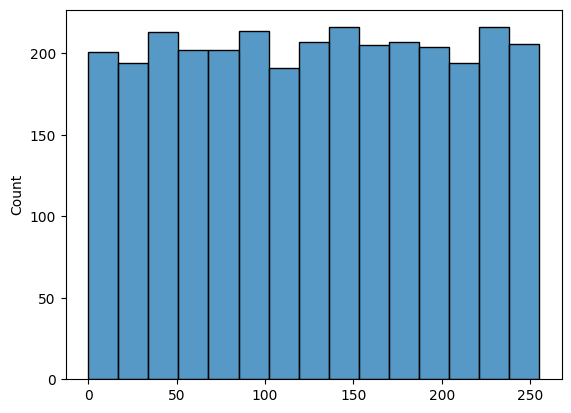

In [346]:
sns.histplot(equ.flatten())

In [347]:
def histogram_stretching(image, r_min, r_max):
    min_pixel = np.min(image)
    max_pixel = np.max(image)

    stretched_image = (image - min_pixel) * ((r_max - r_min) / (max_pixel - min_pixel)) + r_min
    stretched_image = np.clip(stretched_image, 0, 255)

    return stretched_image.astype(np.uint8)

In [352]:
st = histogram_stretching(image2,0,100)

<Axes: ylabel='Count'>

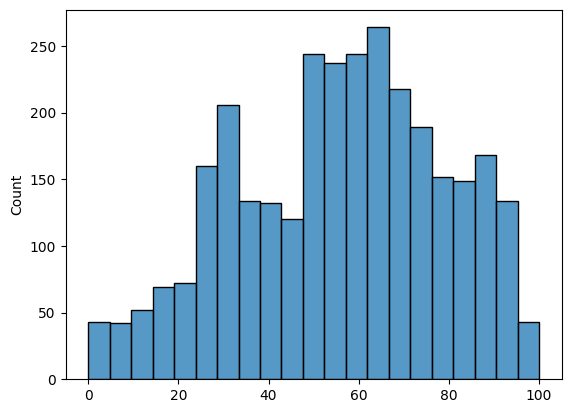

In [353]:
sns.histplot(st.flatten())

In [409]:
def erosion(image, kernel):
    rows,cols,channels = image.shape
    if channels > 1:
        image_grey = cv2.cvtColor(image,cv2.COLOR_BGRA2GRAY)
    else:
        image_grey = image

    pad_rows = kernel.shape[0]//2
    pad_cols = kernel.shape[1]//2
    pad_img = np.pad(image_grey,((pad_rows,pad_rows),(pad_cols,pad_cols)))

    eroded = np.zeros_like(image_grey)

    for i in range(rows):
        for j in range(cols):
            neighborhood = pad_img[i:i+kernel.shape[0],j:j+kernel.shape[1]]
            eroded[i,j] = np.min(neighborhood*kernel)

    return eroded

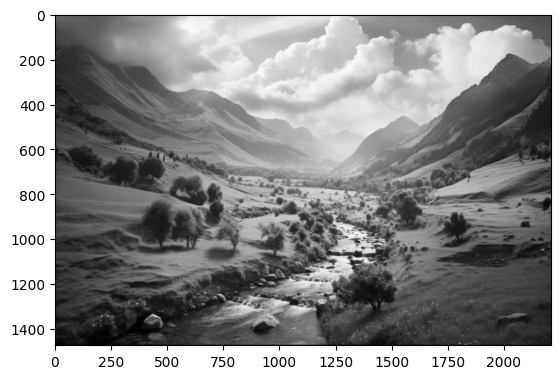

In [410]:
plt.imshow(erosion(image,np.array([[2,2,2],[2,2,1],[2,2,2]])),cmap="gray")

In [404]:
def dilation(image,kernel):
    rows,cols,channels = image.shape
    k_rows,k_cols = kernel.shape
    if channels > 1:
        image_grey = image = cv2.cvtColor(image,cv2.COLOR_BGRA2GRAY)
    else:
        image_grey = image
    
    pad_rows = k_rows // 2
    pad_cols = k_cols // 2
    pad_image = np.pad(image_grey,((pad_rows,pad_rows),(pad_cols,pad_cols)))
    dilated = np.zeros_like(image_grey)

    for i in range(rows):
        for j in range(cols):
            neighborhood = pad_image[i:i+k_rows,j:j+k_cols]
            dilated[i,j] = np.max(neighborhood*kernel)
    return dilated
    

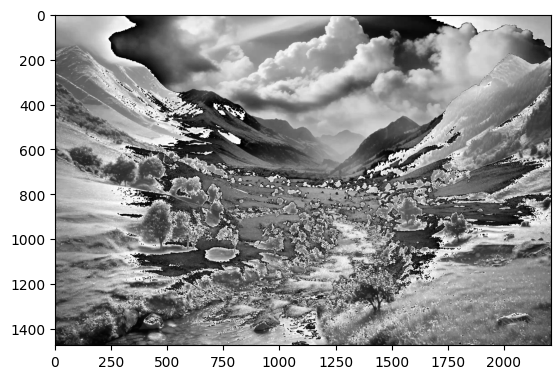

In [405]:
plt.imshow(dilation(image,np.array([[2,2,2],[2,2,1],[2,2,2]])),cmap="gray")

In [419]:
def hit_or_miss(image, fore_kernel, back_kernel):
    rows, cols,channels = image.shape
    if channels > 1:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    k_rows, k_cols = fore_kernel.shape
    pad_height = k_rows // 2
    pad_width = k_cols // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    result = np.zeros_like(image)

    for i in range(1, rows - 1):  # Exclude border pixels
        for j in range(1, cols - 1):
            neighborhood = padded_image[i-pad_height:i+pad_height+1, j-pad_width:j+pad_width+1]
            if np.array_equal(neighborhood * fore_kernel, fore_kernel) and np.array_equal((~neighborhood) * back_kernel, back_kernel):
                result[i, j] = 255

    return result

In [435]:
binary_image=np.where(image >127,1,0)

In [439]:
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=np.power(-1,(i+j))*image[i,j]
    return new_image